# Continuous Control

---

This notebook demonstrates the use of Deep-Reinforcement-Learning in Unity environment.

### 1. Start the Environment

Run this code to set up the environment. Note that you may be missing some packages. 
SingleBrainEnv takes a path to a Unity app, in thos case it is Reacher for Linux without visualisations and with multiple agents.

In [1]:
import sys
sys.path.insert(0, '..') # enables the notebook to find the drl module

from os.path import expanduser
from drl.env import EnvHelper
from drl.unity.env import SingleBrainEnv
import drl.hyperparams as hp
import drl.agent.DDPG as ddpg
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
env = SingleBrainEnv(expanduser("~") + '/Reacher_Linux_NoVis_multi/Reacher.x86_64')
helper = EnvHelper(env)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Test run
We will choose some hyperparameters and try to train the agent. The environment is considered to be solved when an agent reaches a mean score of 30 over 100 attempts.

In [2]:
conf = list(hp.hyper_space_ns({'seed': [101]}))[0]

conf.batch_size = 512 # batch size for the learning phase
conf.buffer_size = int(1e5) # size of the memory buffer
conf.lr_c = 1e-2 # learning rate of critic
conf.lr_a = 1e-3 # learning rate of agent
conf.wd_c = 0.0 # weight decay of critic
conf.s_dim = env.get_state_dim() 
conf.a_dim = env.get_action_dim()

print(conf)
helper.set_agents(ddpg.Agent(conf, device, env.get_num_agents()), 'test-run')
helper.run_until(episodes=50, print_every=25)

{'batch_size': 512, 'buffer_size': 100000, 'seed': 101, 'wd_a': 0, 'wd_c': 0.0, 'lr_c': 0.01, 'lr_a': 0.001, 'gamma': 0.99, 'tau': 0.001, 's_dim': 33, 'a_dim': 4}
Episode 25	Average Score 100: 0.89	Average Score 10: 0.85	Score: 0.88	Steps: 1001
Episode 50	Average Score 100: 0.52	Average Score 10: 0.01	Score: 0.01	Steps: 1001


Lets see the reward plot for the agent

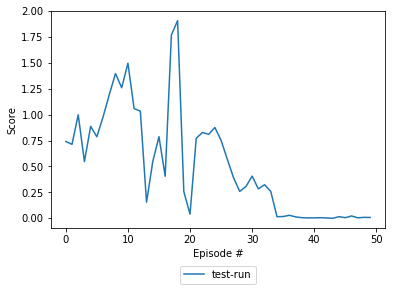

In [3]:
helper.show_plot()

### 3. Hyperparameter optimization
In the next cell we will try to choose some agents by searching the hyperparameter space

In [ ]:
parameters = {
    'lr_c': [1e-4, 1e-5],
    'lr_a': [1e-3, 1e-4]
}

for idx, conf in enumerate(hp.hyper_space_ns(parameters)):
    print('%d --------------------------------------------------------------' % idx)
    conf.batch_size = 512
    conf.buffer_size = int(1e5)
    conf.lr_a = 1e-3
    conf.wd_c = 0.0
    conf.s_dim = env.get_state_dim() 
    conf.a_dim = env.get_action_dim()

    print(conf)
    helper.set_agents(ddpg.Agent(conf, device, env.get_num_agents()), 'tuning-%d' % idx)
    helper.run_until(episodes=50, print_every=25)
    print()
helper.show_plot()

0 --------------------------------------------------------------
{'batch_size': 512, 'buffer_size': 100000, 'seed': 1, 'wd_a': 0, 'wd_c': 0.0, 'lr_c': 0.0001, 'lr_a': 0.001, 'gamma': 0.99, 'tau': 0.001, 's_dim': 33, 'a_dim': 4}
Episode 25	Average Score 100: 13.45	Average Score 10: 30.06	Score: 37.59	Steps: 1001
Episode 50	Average Score 100: 25.05	Average Score 10: 35.47	Score: 34.95	Steps: 1001

1 --------------------------------------------------------------
{'batch_size': 512, 'buffer_size': 100000, 'seed': 1, 'wd_a': 0, 'wd_c': 0.0, 'lr_c': 1e-05, 'lr_a': 0.001, 'gamma': 0.99, 'tau': 0.001, 's_dim': 33, 'a_dim': 4}
Episode 20	Average Score 100: 1.42	Average Score 10: 2.11	Score: 3.17	Steps: 1001

Now we can choose the agent that can solve the environment

In [ ]:
conf.batch_size = 512 # batch size for the learning phase
conf.buffer_size = int(1e5) # size of the memory buffer
conf.lr_c = 1e-4 # learning rate of critic
conf.lr_a = 1e-3 # learning rate of agent
conf.wd_c = 0.0 # weight decay of critic
conf.s_dim = env.get_state_dim() 
conf.a_dim = env.get_action_dim()

print(conf)
helper.set_agents(ddpg.Agent(conf, device, env.get_num_agents()), 'final-run')
helper.run_until(episodes=200, print_every=25)

helper.show_plot()

When finished, you can close the environment.

In [ ]:
env.close()